In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Filtering
- 고주파 : 이미지의 밝기 차가 많이 발생하는 부분 ex) 경계선
- 저주파 : 일반적 배경
- LPF --> Blur, 노이즈 제거
- HPF --> 경계선 찾기
---

### cv2.filter2D()
- 이미지에 kernel적용하여 filtering
- kernel의 크기가 클 수록, 이미지 전체가 blur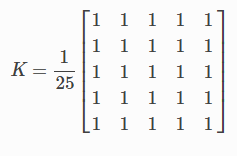

- 이미지의 각 pixel에 kernel을 적용합니다.
- 위 kernel을 예로들면 각 pixel에 5X5윈도우를 올려 놓고, 그 영역안에 포함되는 값의 Sum을 한 후에 25로 나눕니다.
- 그 결과는 해당 윈도우 영역안의 평균값이 되고, 그 값을 해당 pixel에 적용하는 방식

In [13]:
def nothing(x):
    pass

img = cv2.imread('src/image.jpg')
img = cv2.resize(img, (640,480), interpolation = cv2.INTER_AREA)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.namedWindow('image')
cv2.createTrackbar('kernel','image', 1, 20, nothing)

while True:
    if cv2.waitKey(1) == ord('q'):
        break
    k = cv2.getTrackbarPos('kernel','image')
    
    if k == 0:
        k = 1
    kernel = np.ones((k,k),np.float32) / (k*k)
    dst = cv2.filter2D(img, -1, kernel)
    
    cv2.imshow('image',dst)
cv2.destroyAllWindows()

---

### Image Blurring
- by Low Pass Filter

#### Averaging  : cv2.blur(src, kernelsize(tuple))

#### Gaussian Filtering  : cv2.GaussianBlur(src, ksize, sigmaX)
- Gaussian Noise(백색 노이즈)제거에 효과적
- kernel : 양수 & 홀수

#### Median Filtering  : cv2.medianBlur(src, ksize)
- salt-and-pepper noise 제거 효과적

#### Bilateral Filtering  : cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
- 경계선을 유지하며, Gaussian blur
- d : filtering 주변 pixel 지름
- sigmaColor : color 고려 공간 ( 숫자가 크면 먼 색상도 고려 )
- sigmaSpace : 숫자가 크면 먼 픽셀도 고려


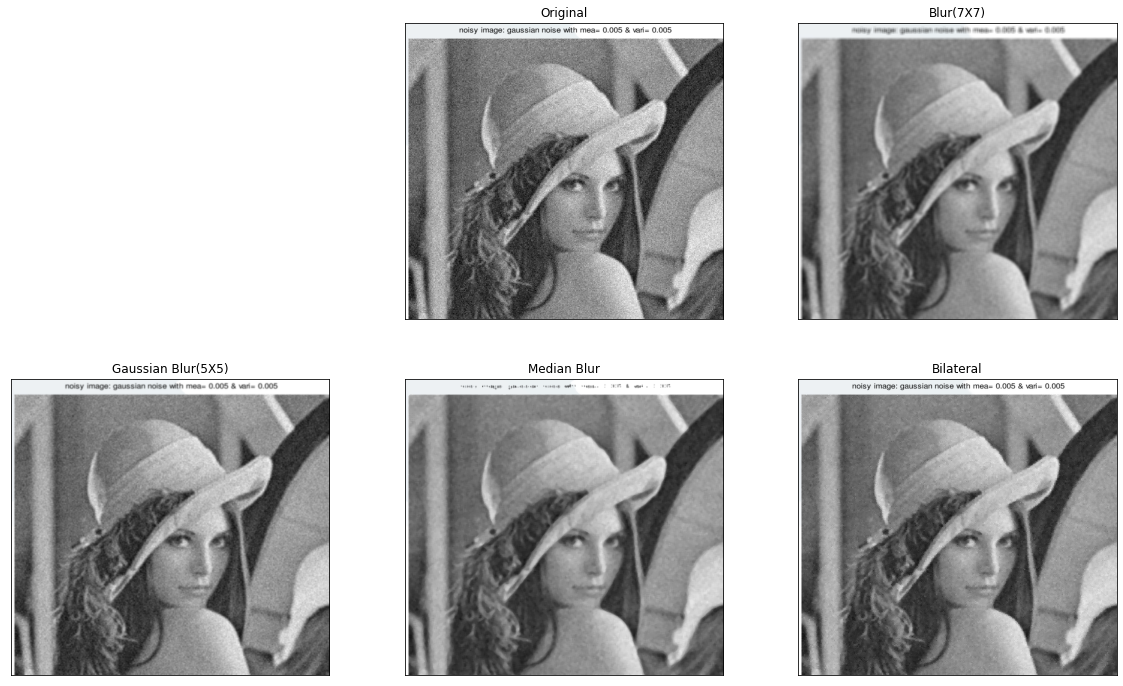

In [29]:
img = cv2.imread('src/noisy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# 일반 Blur
dst1 = cv2.blur(img,(7,7))

# GaussianBlur
dst2 = cv2.GaussianBlur(img,(5,5),0)

# Median Blur
dst3 = cv2.medianBlur(img,7)

# Bilateral Filtering
dst4 = cv2.bilateralFilter(img,9,75,300)

images = [img,dst1,dst2,dst3,dst4]
titles=['Original','Blur(7X7)','Gaussian Blur(5X5)','Median Blur','Bilateral']
plt.figure(figsize = (20,12))
for i in range(5):
    plt.subplot(2,3,i+2),plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

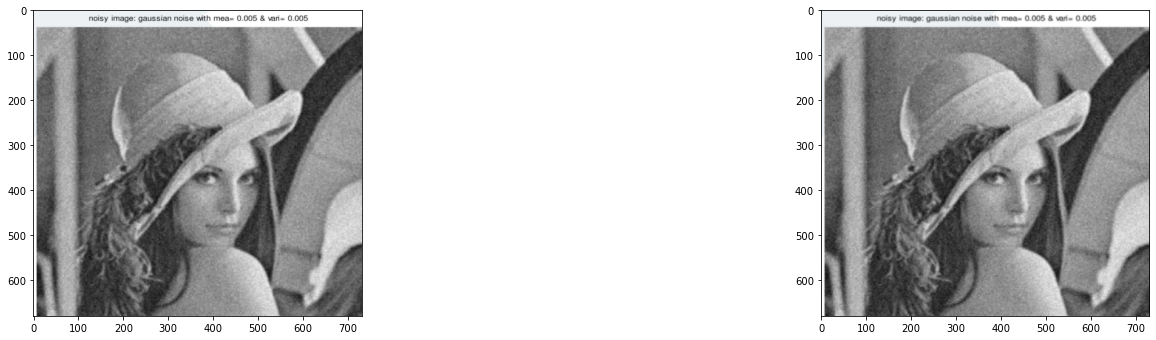

In [45]:
plt.figure(figsize  = (20,12))
plt.subplot(131);plt.imshow(cv2.bilateralFilter(img,5,300,300))

plt.subplot(133);plt.imshow(cv2.GaussianBlur(img,(5,5),0))